# Lending Club Case Study

##### Presented By:
- Qurashy Alsheikh

##  Lending Club Case Study


> * Applying different EDA techniques 
> * How the data is used to minimise loss of money while leanding to customers.


## Breif About Lending Club

LendingClub delivers the growth, innovation, and efficiency of a fintech along with the funding advantages, revenue diversity, and regulatory clarity of a bank. Our differentiated and sustainably-profitable business model allows us to extend our capabilities to help even more members on their paths to financial health. We are focused on delivering even more value to our members by giving them new ways to optimize their money across lending, spending, and saving.


## Business Understanding 

**There are two types of risks associated with the bank’s decision:**

> * If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
> * If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

The data given contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

When a person applies for a loan, there are two types of decisions that could be taken by the company:

> **Loan accepted:** If the company approves the loan, there are 3 possible scenarios described below:
> * **Fully paid**: Applicant has fully paid the loan (the principal and the interest rate)
> * **Current**: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.
> * **Charged-off**: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 
>
> **Loan rejected:** Not Considered as there is no transactional history of those applicants with the company and so this data is not available with the company

So, the analysis will be mainly focused on the <b> Defaulters (Chanrged-off) </b> to identify the patterns in which the applicants default (Stop repaying the loan) 

### Importing the necessary Libraries:

In [1]:
#Load the Libraries

#Pandas for Data Manipluation
import pandas as pd

#Numpy for Numeric operations
import numpy as np

#Seaborn and Matplotlib for Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Displaying purposes
pd.set_option('display.max_rows', 130, 'display.max_columns', 130)
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Reading the Data

In [3]:
#Read the Data
df = pd.read_csv(r'D:\Upgrade Master Degree\Lending Club Study\loan.csv' )


#Shape of DataFrame
df.shape

(39717, 111)

In [4]:
#Displaying basic information about the data
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

In [5]:
#Displaying quantitative information about numeric variables
df.describe()

id    member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
count    39,717.00    39,717.00  39,717.00    39,717.00        39,717.00   
mean    683,131.91   850,463.56  11,219.44    10,947.71        10,397.45   
std     210,694.13   265,678.31   7,456.67     7,187.24         7,128.45   
min      54,734.00    70,699.00     500.00       500.00             0.00   
25%     516,221.00   666,780.00   5,500.00     5,400.00         5,000.00   
50%     665,665.00   850,812.00  10,000.00     9,600.00         8,975.00   
75%     837,755.00 1,047,339.00  15,000.00    15,000.00        14,400.00   
max   1,077,501.00 1,314,167.00  35,000.00    35,000.00        35,000.00   

       installment   annual_inc       dti  delinq_2yrs  inq_last_6mths  \
count    39,717.00    39,717.00 39,717.00    39,717.00       39,717.00   
mean        324.56    68,968.93     13.32         0.15            0.87   
std         208.87    63,793.77      6.68         0.49            1.07   
min          15.69     4,000.00      0.00         0.00            0.00   
25%         167.02    40,404.00      8.17         0.00            0.00   
50%         280.22    59,000.00     13.40         0.00            1.00   
75%         430.78    82,300.00     18.60         0.00            1.00   
max       1,305.19 6,000,000.00     29.99        11.00            8.00   

       mths_since_last_delinq  mths_since_last_record  open_acc   pub_rec  \
count               14,035.00                2,786.00 39,717.00 39,717.00   
mean                    35.90                   69.70      9.29      0.06   
std                     22.02                   43.82      4.40      0.24   
min                      0.00                    0.00      2.00      0.00   
25%                     18.00                   22.00      6.00      0.00   
50%                     34.00                   90.00      9.00      0.00   
75%                     52.00                  104.00     12.00      0.00   
max                    120.00                  129.00     44.00      4.00   

       revol_bal  total_acc  out_prncp  out_prncp_inv  total_pymnt  \
count  39,717.00  39,717.00  39,717.00      39,717.00    39,717.00   
mean   13,382.53      22.09      51.23          50.99    12,153.60   
std    15,885.02      11.40     375.17         373.82     9,042.04   
min         0.00       2.00       0.00           0.00         0.00   
25%     3,703.00      13.00       0.00           0.00     5,576.93   
50%     8,850.00      20.00       0.00           0.00     9,899.64   
75%    17,058.00      29.00       0.00           0.00    16,534.43   
max   149,588.00      90.00   6,311.47       6,307.37    58,563.68   

       total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
count        39,717.00        39,717.00      39,717.00           39,717.00   
mean         11,567.15         9,793.35       2,263.66                1.36   
std           8,942.67         7,065.52       2,608.11                7.29   
min               0.00             0.00           0.00                0.00   
25%           5,112.31         4,600.00         662.18                0.00   
50%           9,287.15         8,000.00       1,348.91                0.00   
75%          15,798.81        13,653.26       2,833.40                0.00   
max          58,563.68        35,000.02      23,563.68              180.20   

       recoveries  collection_recovery_fee  last_pymnt_amnt  \
count   39,717.00                39,717.00        39,717.00   
mean        95.22                    12.41         2,678.83   
std        688.74                   148.67         4,447.14   
min          0.00                     0.00             0.00   
25%          0.00                     0.00           218.68   
50%          0.00                     0.00           546.14   
75%          0.00                     0.00         3,293.16   
max     29,623.35                 7,002.19        36,115.20   

       collections_12_mths_ex_med  mths_since_last_major_derog  poli

## Data Cleaning
**Below are the Steps by which Data Cleaning Process will be accomplished:**

* Fix rows and columns
* Fix missing values
* Standardise values
* Fix invalid values
* Filter data

### Fix Rows and Columns

In [6]:
#Check whther there is empty columns
df.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [7]:
#Delete Empty Columns as it does not contribute to our analysis
df.dropna(axis = 1, how = 'all', inplace = True)

In [8]:
#checking
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_

In [9]:
#Deleting Customer behaviour variables.  They are not available at the time of loan application, 
#and thus they cannot be used as predictors for credit approval. IDs columns, desc, url title also to be deleted, they are not considered to used
#to predict LoanStatus

df.drop(['delinq_2yrs', 'earliest_cr_line',  'inq_last_6mths', 
'open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv',
'total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d',
'last_pymnt_amnt','last_credit_pull_d', 'id','member_id', 'url', 'desc','title', 'emp_title','pub_rec_bankruptcies'], axis=1, inplace = True)

In [10]:
#Check again for the shape of the dataset
df.shape

(39717, 30)

### Fix Missing Values

###### Assumption:

**Variables that has more then 60% missing values, it will be deleted.**

In [11]:
# Deleting missing varaibles that has more than 60% missing values

#identify the columns
null_values_variables = []
for i in df.columns:
    if df[i].isnull().sum()/df.shape[0] >= 0.6:
        null_values_variables.append(i)
null_values_variables        

['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d']

In [12]:
#Dropping the columns
df.drop(null_values_variables, axis = 1, inplace = True)

**Deleting Empty Rows**

In [13]:
#before deleting Rows
df.shape

(39717, 27)

In [14]:
#dropping the rows
df.dropna(axis=0, how = 'all', inplace = True)

In [15]:
#After deleting Rows
df.shape

(39717, 27)

**No Empty Rows**

**Deleting Variables with no Variation. These variables has no effect on the target variable.**

In [16]:
#Identify the variables that has only one value
one_value_variables = []
for i in df.columns:
    if df[i].nunique() == 1:
        one_value_variables.append(i)
one_value_variables        

['pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [17]:
#dropping the variables that has one value.
df.drop(one_value_variables, axis = 1, inplace = True)

In [18]:
#checking the shape again. 
df.shape

(39717, 18)

In [19]:
#We are left only with 23 variables.
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'zip_code', 'addr_state', 'dti'],
      dtype='object')

In [20]:
#Check variable with missing values
df.isnull().sum()

loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length             1075
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
zip_code                  0
addr_state                0
dti                       0
dtype: int64

Dealing with <b> emp_length</b>

In [21]:
#identify the most occurring value
df.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [22]:
#impute the null values with the mode
df.emp_length.fillna(df.emp_length.mode()[0], inplace = True)

In [23]:
#Chceking no null values 
df.emp_length.isnull().sum()

0

In [24]:
#See the result again
df.isnull().sum()

loan_amnt              0
funded_amnt            0
funded_amnt_inv        0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
zip_code               0
addr_state             0
dti                    0
dtype: int64

&nbsp;

&nbsp;

### Standarize Values

**Visualizing the Numerical variables using boxplot**

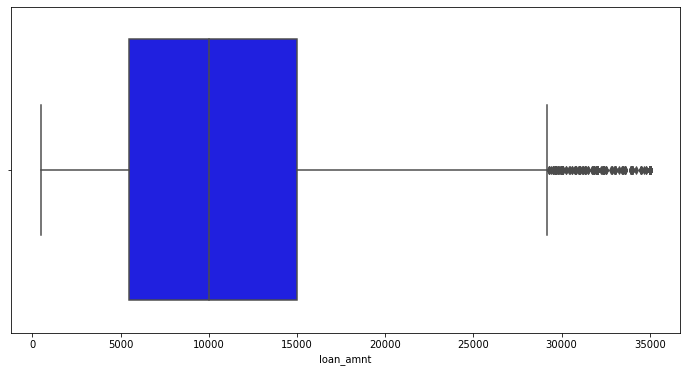

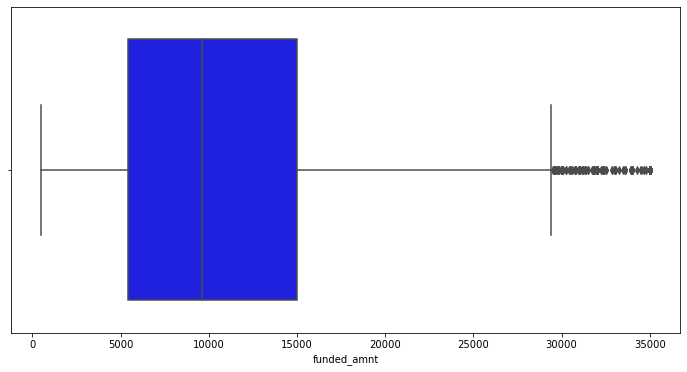

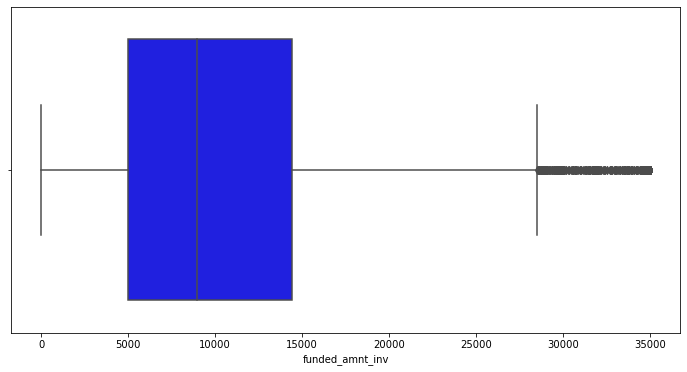

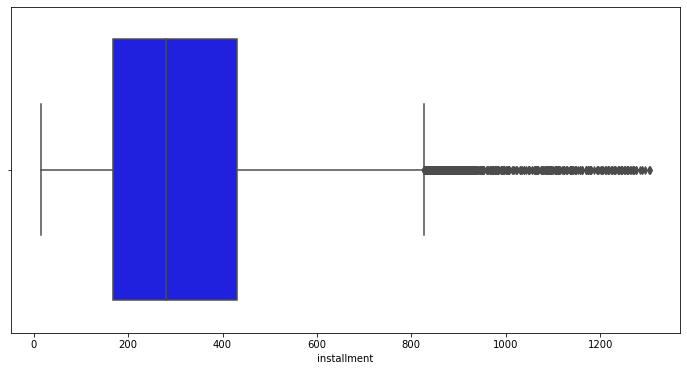

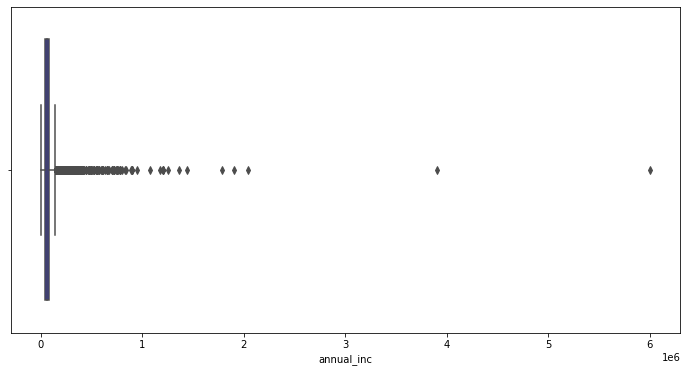

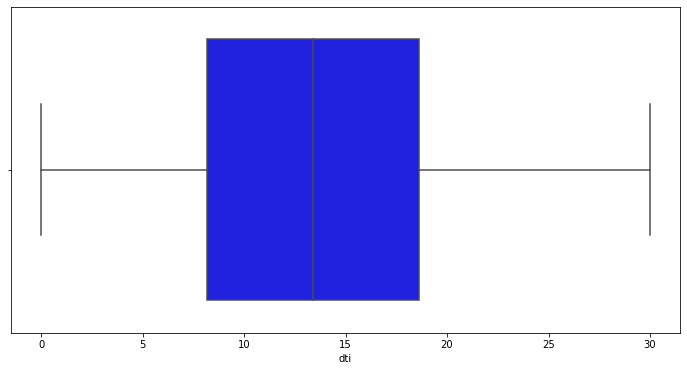

In [25]:
# We will loop through all the numberic variables and plot boxplot for them to see if we have outliers.

sns.set_palette(['blue'])
for i in df.select_dtypes(include=["number"]).columns.to_list():
    fig, ax = plt.subplots(figsize = (12,6))
    sns.boxplot(df[i])
    
plt.show()

&nbsp;

We Will remove outliers from <b> Annual Income & installment </b> variables

In [26]:
#Percentiles of Annual Income
df.annual_inc.quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.85,0.9,0.95])

0.10    30,000.00
0.20    37,500.00
0.30    45,000.00
0.40    50,400.00
0.50    59,000.00
0.60    65,844.40
0.70    75,600.00
0.80    90,000.00
0.85   100,000.00
0.90   116,000.00
0.95   142,000.00
Name: annual_inc, dtype: float64

In [27]:
#Removing The outlier from Annual Income
df = df[df['annual_inc'] <= df['annual_inc'].quantile(0.9)]

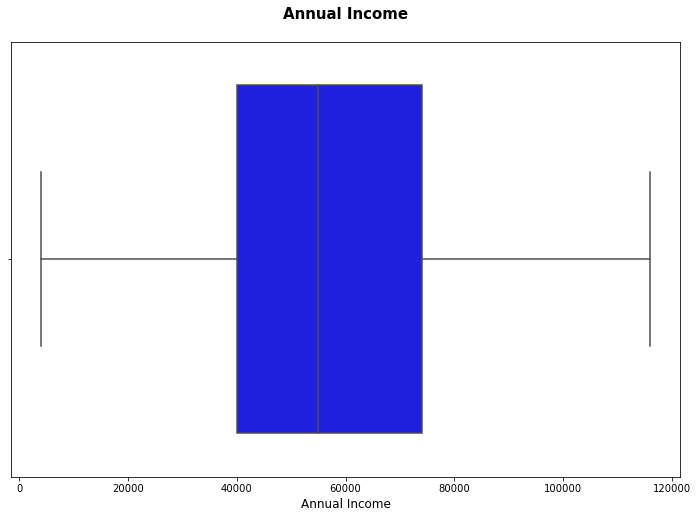

In [28]:
#Checking the Boxplot again
sns.set_palette(['blue'])
fig, ax = plt.subplots(figsize = (12,8))
sns.boxplot(df['annual_inc'])
plt.title('Annual Income\n', fontsize = 15, weight = 'bold')
plt.xlabel('Annual Income', fontsize = 12)
plt.show()

&nbsp;

In [29]:
#Percentiles of Annual Income
df.installment.quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.85,0.9,0.95])

0.10    97.16
0.20   142.17
0.30   180.42
0.40   219.04
0.50   266.40
0.60   316.63
0.70   370.19
0.80   454.25
0.85   501.11
0.90   569.60
0.95   685.76
Name: installment, dtype: float64

In [30]:
#Removing The outlier from Annual Income
df = df[df['installment'] <= df['installment'].quantile(0.9)]

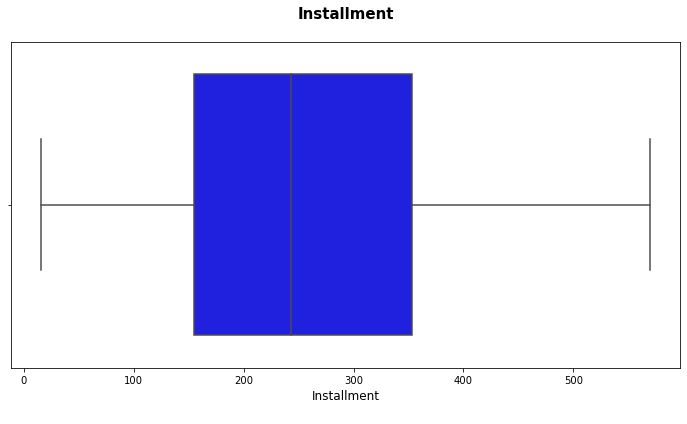

In [31]:
#Checking the Boxplot again
sns.set_palette(['blue'])
fig, ax = plt.subplots(figsize = (12,6))
sns.boxplot(df['installment'])
plt.title('Installment\n', fontsize = 15, weight = 'bold')
plt.xlabel('Installment\n', fontsize = 12)
plt.show()

In [32]:
#Checking again
df.isnull().sum()

loan_amnt              0
funded_amnt            0
funded_amnt_inv        0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
zip_code               0
addr_state             0
dti                    0
dtype: int64

&nbsp;

### Invalid Values

**We noticed there are some variables need to be formatted correctly in order for analysis to be ready**

In [33]:
#Check the term variable
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [34]:
#space has to be removed
df['term'] = df['term'].apply(lambda x: x.strip(' '))

In [35]:
#Checking again
df['term'].unique()

array(['36 months', '60 months'], dtype=object)

&nbsp;

In [36]:
#check Interst Rate. It is supposed to be numeric. So we'll delete the percent sign
df['int_rate'] = df['int_rate'].apply(lambda x: float(x.strip('%')))

In [37]:
#Ckecking again
df['int_rate'].dtype

dtype('float64')

&nbsp;

In [38]:
#checking the emp length
df['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years'],
      dtype=object)

In [39]:
#Since no null values, we'll convert the variables to numeric and clean it
df['emp_length'] = df['emp_length'].apply(lambda x: str(x).strip(' years').rstrip('+'))
df['emp_length'] = df['emp_length'].replace('< 1','0.5').astype('float')

In [40]:
#0.5 means less than one year
df['emp_length'].unique()

array([10. ,  0.5,  1. ,  3. ,  8. ,  9. ,  4. ,  5. ,  6. ,  2. ,  7. ])

&nbsp;


### Filtering Data

In [41]:
#the variable we are interest in
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [42]:
#it has a Current value. We will not get use of the 'Current' value since it will not help us identifying the patterns for the defaulters
#So Deleteing the 'Current' value

df=df[df['loan_status'].isin(['Fully Paid', 'Charged Off'])]

In [43]:
#Check again
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

&nbsp;

***Loan Amount or Funded Amount or Funded Amount By investor***

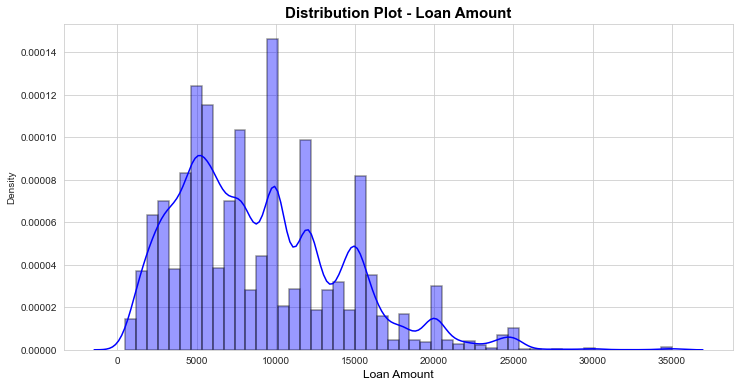

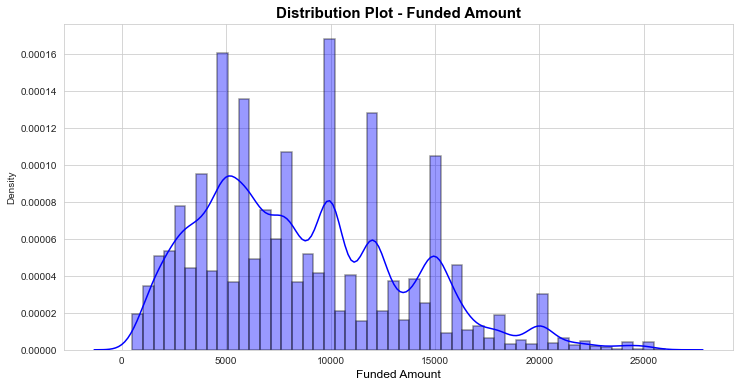

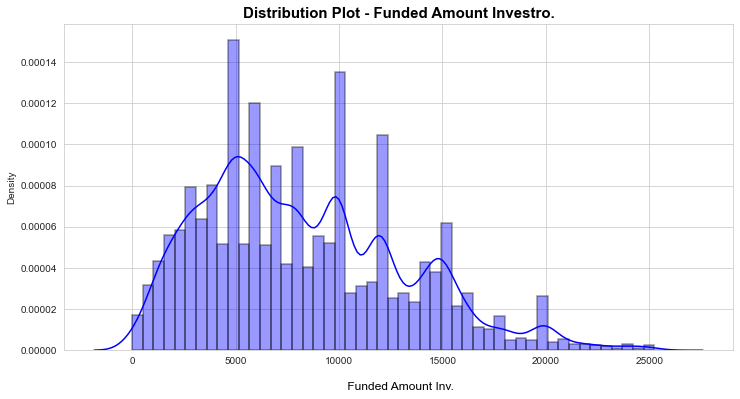

In [44]:
#Plotting the variables

sns.set_palette('tab10')
#first plot
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
ax = sns.distplot(df['loan_amnt'], color = 'blue' ,hist_kws=dict(edgecolor="black", linewidth=1.5) )
ax.set_title('Distribution Plot - Loan Amount', weight = 'bold',fontsize=15,color='black')
ax.set_xlabel('Loan Amount',fontsize=12,color='black')
plt.show()


#Second plot
plt.figure(figsize=(12,6))
ax = sns.distplot(df['funded_amnt'], color = 'blue', hist_kws=dict(edgecolor="black", linewidth=1.5))
ax.set_title('Distribution Plot - Funded Amount', weight = 'bold',fontsize=15,color='black')
ax.set_xlabel('Funded Amount',fontsize=12,color='black')
plt.show()


#third plot
plt.figure(figsize=(12,6))
ax = sns.distplot(df['funded_amnt_inv'], color = 'blue', hist_kws=dict(edgecolor="black", linewidth=1.5))
ax.set_title('Distribution Plot - Funded Amount Investro.', weight = 'bold',fontsize=15,color='black')
ax.set_xlabel('\n Funded Amount Inv.',fontsize=12,color='black')
plt.show()

<b> Inference: </b>
 There are spike in every 5K of the funded amount by investors.   
 
The three variables are nearly similar, so will use only one

We will use the 'Funded Amount Investor'. As it is the actual amount given to the applicant

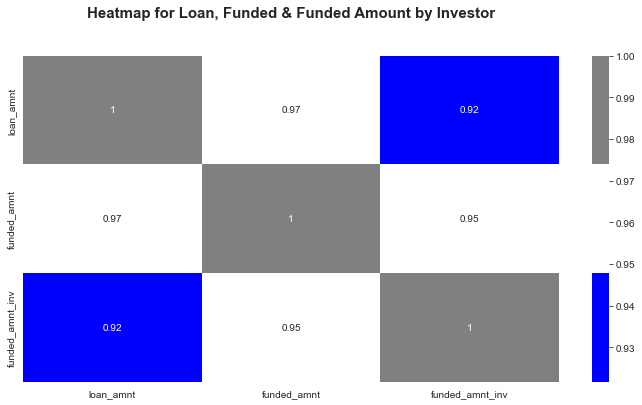

In [45]:
#Just for illustration
amount_variables = ['loan_amnt','funded_amnt','funded_amnt_inv']
plt.figure(figsize=(12,6))
df[amount_variables].corr()
sns.heatmap(df[amount_variables].corr(), annot=True, cmap=['blue','white','gray'])
plt.title('Heatmap for Loan, Funded & Funded Amount by Investor\n\n', fontsize = 15, weight= 'bold')
plt.show()

&nbsp;

### Derived Variables

In [46]:
#Date of issue can be Month and Year
df['issue_d'].unique()

array(['Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11',
       'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11',
       'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10',
       'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09',
       'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09',
       'Dec-08', 'Nov-08', 'Oct-08', 'Sep-08', 'Aug-08', 'Jul-08',
       'Jun-08', 'May-08', 'Apr-08', 'Mar-08', 'Feb-08', 'Jan-08',
       'Dec-07', 'Nov-07', 'Oct-07', 'Sep-07', 'Aug-07', 'Jul-07',
       'Jun-07'], dtype=object)

In [47]:
#Extracting Month and Year
df['Month'] = df['issue_d'].apply(lambda x: x.split('-')[0])
df['Year'] = df['issue_d'].apply(lambda x: '20' + x.split('-')[1])    

In [48]:
#Checking
df.Month.unique()

array(['Dec', 'Nov', 'Oct', 'Sep', 'Aug', 'Jul', 'Jun', 'May', 'Apr',
       'Mar', 'Feb', 'Jan'], dtype=object)

In [49]:
#Checking
df.Year.unique()

array(['2011', '2010', '2009', '2008', '2007'], dtype=object)

&nbsp;

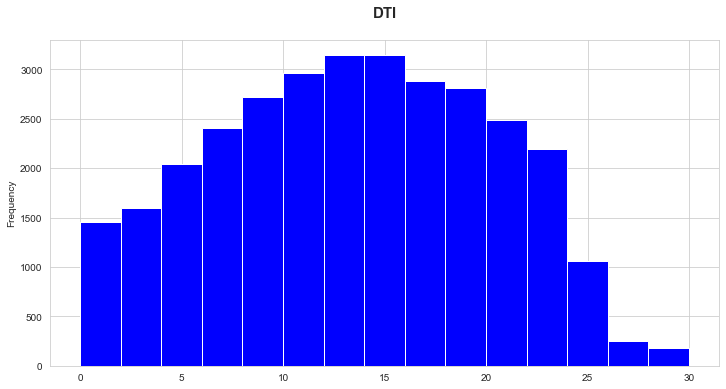

In [50]:
#checking debt to income to know to how many category we can divide
sns.set_palette(['gray','blue'])
plt.figure(figsize = (12,6))
df['dti'].plot(kind='hist', bins =15, color = 'blue')
plt.title('DTI\n', fontsize = 15, weight = 'bold')
plt.show()

In [51]:
# we can convert dti variable into categorical intervals, which may help in analysis
df['debt_to_income'] = pd.cut(x = df['dti'], bins = 6, labels = ['0-5','5-10','10-15','15-20','20-25','25-30'])

In [52]:
#Checking dti
df['debt_to_income'].unique()

['25-30', '0-5', '5-10', '20-25', '10-15', '15-20']
Categories (6, object): ['0-5' < '5-10' < '10-15' < '15-20' < '20-25' < '25-30']

##### Mapping Loan Status to zero and one

In [53]:
#mapping the two categories of laon status to zeros and ones.
df['loan_status'] = df['loan_status'].map({'Fully Paid': 0, 'Charged Off': 1})

&nbsp;

&nbsp;

&nbsp;

# Data  Analysis

Let's check first <b> Loan Status </b>

In [54]:
#Loan Status
df['loan_status'].value_counts()

0    26765
1     4580
Name: loan_status, dtype: int64

In [55]:
#Centering the graphs
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

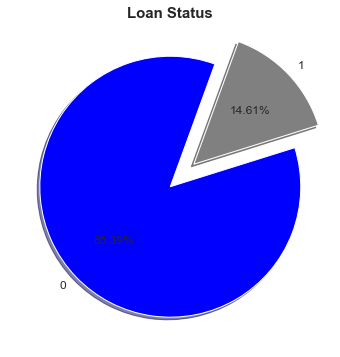

In [56]:
#pie chart for loan status
sns.set_palette(['blue', 'gray'])
fig = plt.figure(figsize=(12,6))
df['loan_status'].value_counts().plot(kind= 'pie', explode=[0,0.25], autopct='%1.2f%%', shadow=True, 
                                              fontsize=12, startangle=70)
plt.ylabel('', fontsize = 15)
plt.title('Loan Status',  weight = 'bold',fontsize = 15)
plt.show()

<b> Inference:</b> 
1. Most Applicants do complete their dues
2. Dataset is imbalanced i.e. the number of one class is larger than the other.

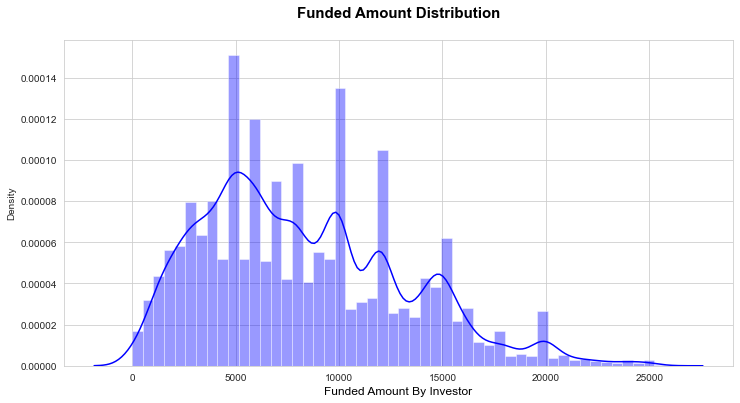

In [57]:
#Distribution for Funded Amount by Investor
sns.set_palette(['blue'])
plt.figure(figsize = (12,6))
sns.distplot( df["funded_amnt_inv"],  color='blue' )
plt.title('Funded Amount Distribution\n',weight = 'bold',fontsize=15,color='black')
plt.xlabel('Funded Amount By Investor', fontsize=12,color='black')
plt.show()

<b> Inference:</b> Most funds varies from 4K to 10k approximately  

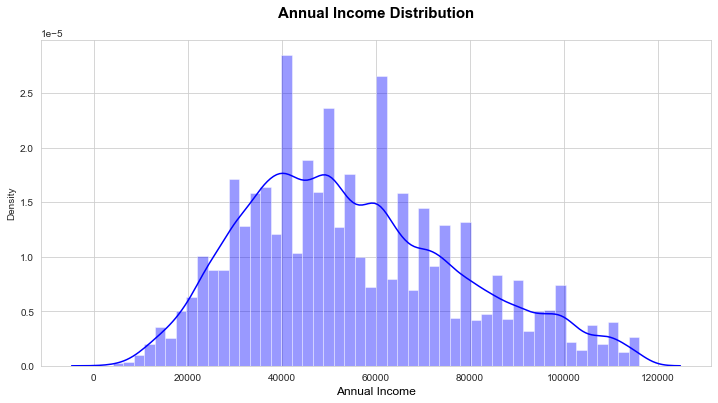

In [58]:
#Distribution for Funded Amount by Investor
sns.set_palette(['blue'])
plt.figure(figsize = (12,6))
sns.distplot( df["annual_inc"],  color='blue' )
plt.title('Annual Income Distribution\n',weight = 'bold',fontsize=15,color='black')
plt.xlabel('Annual Income', fontsize=12,color='black')
plt.show()

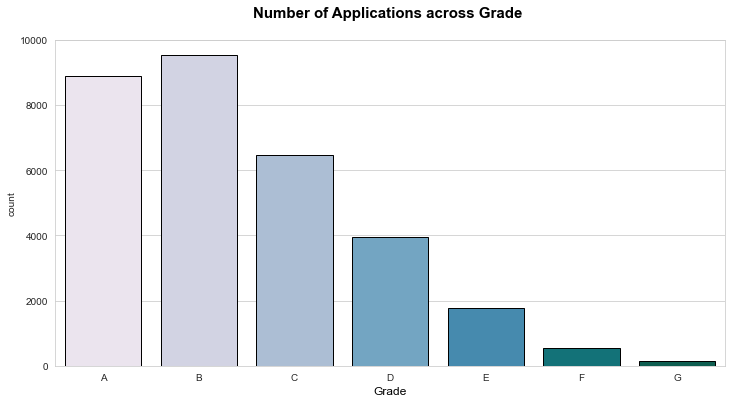

In [59]:
#number of application across Grades
plt.figure(figsize = (12,6))
sns.countplot(x='grade', data=df, palette='PuBuGn' ,order=['A','B','C','D','E','F','G'], edgecolor = 'black')
plt.title('Number of Applications across Grade \n', weight = 'bold', fontsize=15,color='black')
plt.xlabel('Grade', fontsize=12,color='black')
plt.show()

<b> Inference:</b> Grade 'B' is has the maximum number of loan applications

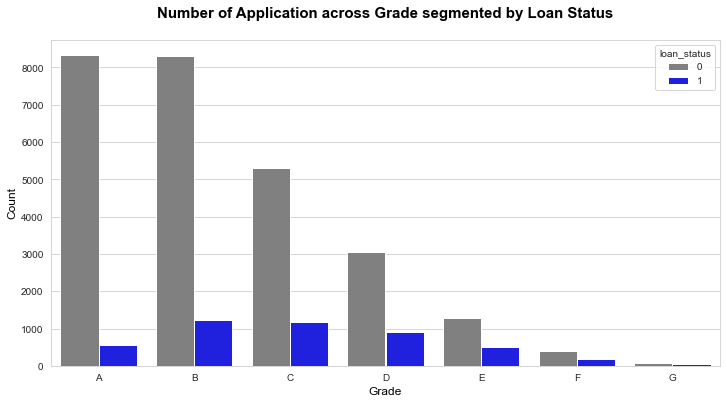

In [60]:
#Number of Application across Grade segmented by Loan Status
sns.set_palette(['gray','blue'])
plt.figure(figsize = (12,6))
sns.countplot(x='grade', data=df, hue= 'loan_status', order=['A','B','C','D','E','F','G'])
plt.title('Number of Application across Grade segmented by Loan Status\n', weight = 'bold',fontsize=15,color='black')
plt.xlabel('Grade', fontsize=12,color='black')
plt.ylabel('Count', fontsize=12,color='black')
plt.show()

<b>Inference:</b> Grade 'B' & 'C' cateogries has the highest number of defaulters. Let's see the proportion

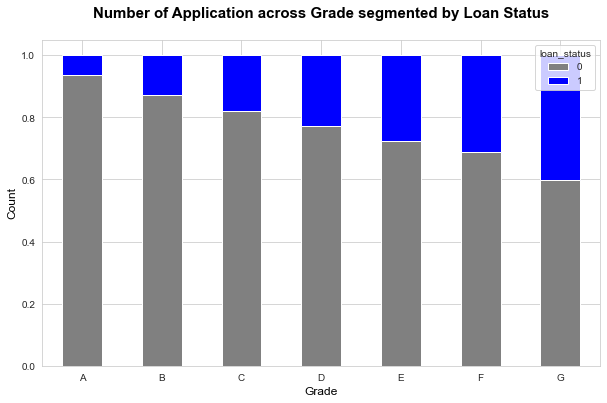

In [61]:
#Stacked bar chart to see proportion
from matplotlib import cm
from matplotlib.colors import ListedColormap

cmp = ListedColormap(['gray', 'blue'])
pd.crosstab(index=df['grade'],
                             columns=df['loan_status']
                             ,normalize="index").plot(kind='bar', 
                    stacked=True, 
                    cmap=cmp, 
                    figsize=(10, 6), )
plt.title('Number of Application across Grade segmented by Loan Status\n', weight = 'bold',fontsize=15,color='black')
plt.xlabel('Grade', fontsize=12,color='black')
plt.ylabel('Count', fontsize=12,color='black')
plt.xticks(rotation = 0)
plt.show()

<b>Inference:</b> 

Grade 'G' & 'F' cateogries has the highest probability to default.

In [62]:
#Cleaning the SubGrade variables to have only numbers 
df['sub_grade'] = df['sub_grade'].apply(lambda x: x[-1])

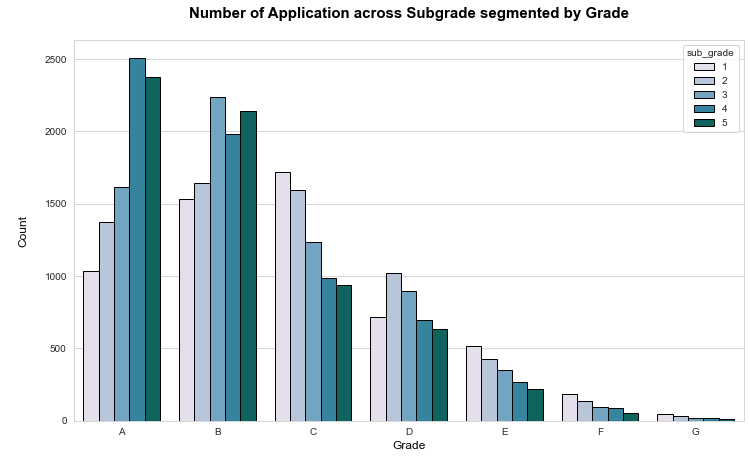

In [63]:
#plot of Number of Application across Subgrade segmented by Grade

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(12,7))
sns.countplot(x = 'grade', palette = 'PuBuGn',  order=['A','B','C','D','E','F','G'], hue = 'sub_grade',hue_order = ['1','2','3','4','5'],edgecolor = 'black', data = df)
plt.title('Number of Application across Subgrade segmented by Grade\n',  weight = 'bold', fontsize=15,color='black')
plt.xlabel('Grade', fontsize=12,color='black')
plt.ylabel('\nCount\n', fontsize=12,color='black')
plt.show()

<b> Inference: </b> 
1. Most of Grade 'A' applicants in subgrades '4' and '5'
2. Generally, applicants in Grade 'A' increases as we go to the lowest subgrades. Applicants in Grade 'C' decreases as we go to the lowest sugrades. 
3. in higher grade "A" & "B" most applicants from lower subgrades, unlike Grade "C" and below.

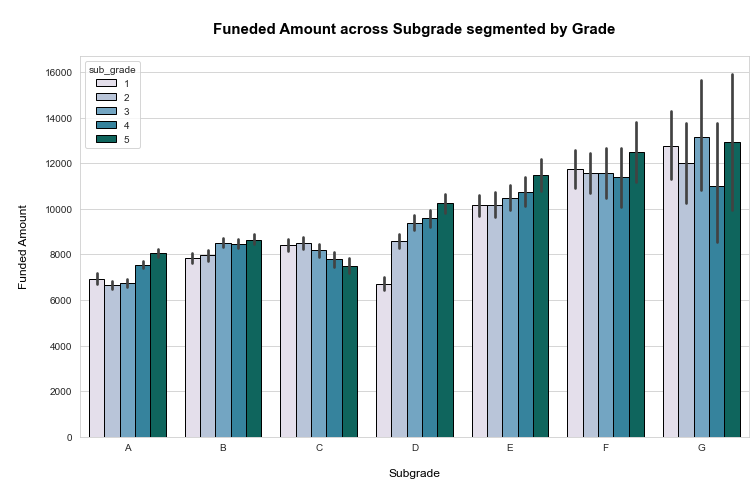

In [64]:
#plot of Funeded Amount across Subgrade segmented by Grade

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(12,7))
sns.barplot(y='funded_amnt_inv', x = 'grade', palette = 'PuBuGn',  order=['A','B','C','D','E','F','G'], hue = 'sub_grade',hue_order = ['1','2','3','4','5'],edgecolor = 'black', data = df)
plt.title('\nFuneded Amount across Subgrade segmented by Grade\n',  weight = 'bold',fontsize=15,color='black')
plt.xlabel('\nSubgrade\n', fontsize=12,color='black')
plt.ylabel('\nFunded Amount\n', fontsize=12,color='black')
plt.show()

<b> Inference: </b>
Generally, Grade 'G' is the most funded grade of all grades, even though they are the least who applies for the loan. Grade 'A' is the least in terms of funding. 

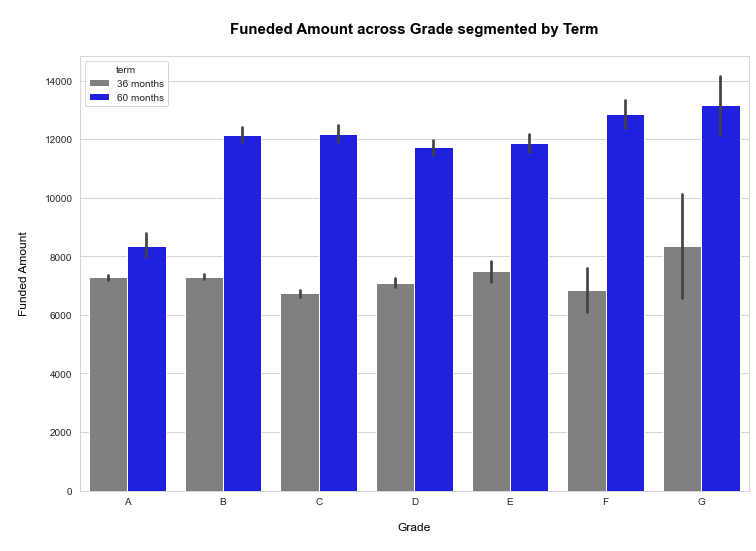

In [65]:
#grade vs Funded Amount across term
sns.set_palette(['gray','blue'])
plt.figure(figsize = (12,8))
sns.barplot(data=df, 
              x='grade', 
              y='funded_amnt_inv', 
              hue="term", order = ['A','B','C','D','E','F','G'])
plt.title('\nFuneded Amount across Grade segmented by Term\n', weight = 'bold', fontsize=15,color='black')
plt.xlabel('\nGrade\n', fontsize=12,color='black')
plt.ylabel('\nFunded Amount\n', fontsize=12,color='black')
plt.show()

<b> Inference: </b>
Generally '60 Months' term is funded more than the '36 Months' in all grades

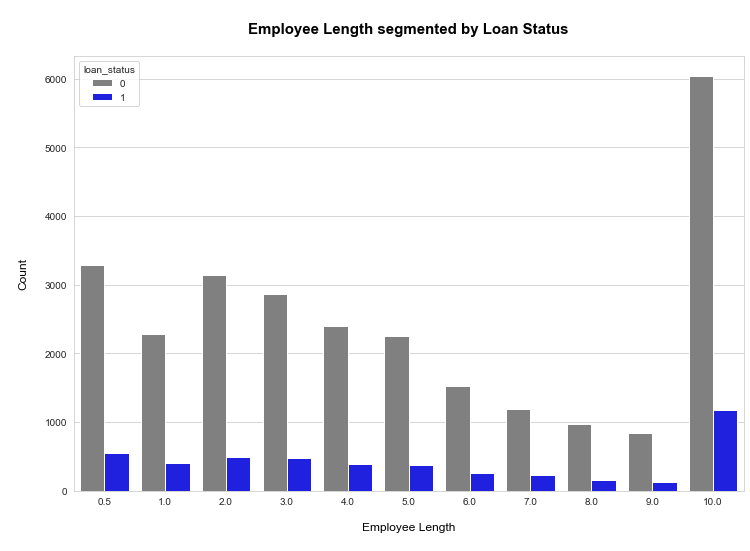

In [66]:
#plot of emp_length
sns.set_palette(['gray','blue'])
sns.set_style("whitegrid")
plt.figure(figsize = (12,8))
sns.countplot(x='emp_length', hue='loan_status', data=df)
plt.title('\nEmployee Length segmented by Loan Status\n',  weight = 'bold',fontsize=15,color='black')
plt.xlabel('\nEmployee Length\n', fontsize=12,color='black')
plt.ylabel('\nCount\n', fontsize=12,color='black')
plt.show()

<b> Inference: </b> Most loans appliactions from Employee who has working experience 10 years

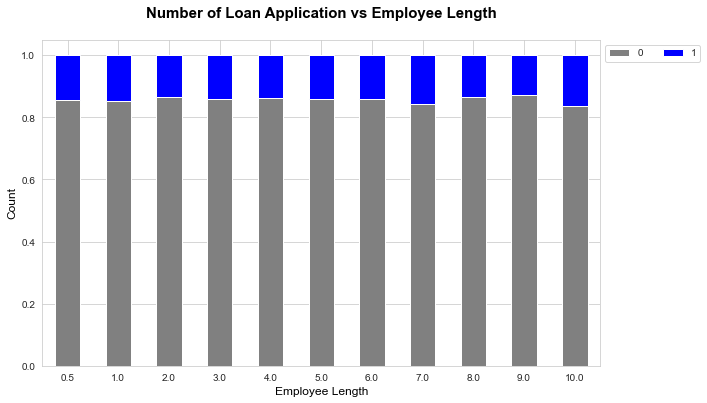

In [67]:
#Stacked bar chart to see proportion
from matplotlib import cm
from matplotlib.colors import ListedColormap

cmp = ListedColormap(['gray', 'blue'])
pd.crosstab(index=df['emp_length'],
                             columns=df['loan_status']
                             ,normalize="index").plot(kind='bar', 
                    stacked=True, 
                    cmap=cmp, 
                    figsize=(10, 6), )
plt.title('Number of Loan Application vs Employee Length\n', weight = 'bold',fontsize=15,color='black')
plt.xlabel('Employee Length', fontsize=12,color='black')
plt.ylabel('Count', fontsize=12,color='black')
plt.xticks(rotation = 0)
plt.legend(bbox_to_anchor =(1, 1), ncol = 2)
plt.show()

<b> Inference: </b>

Employee Length of more than 10 years has the highest probability for a customer to default.

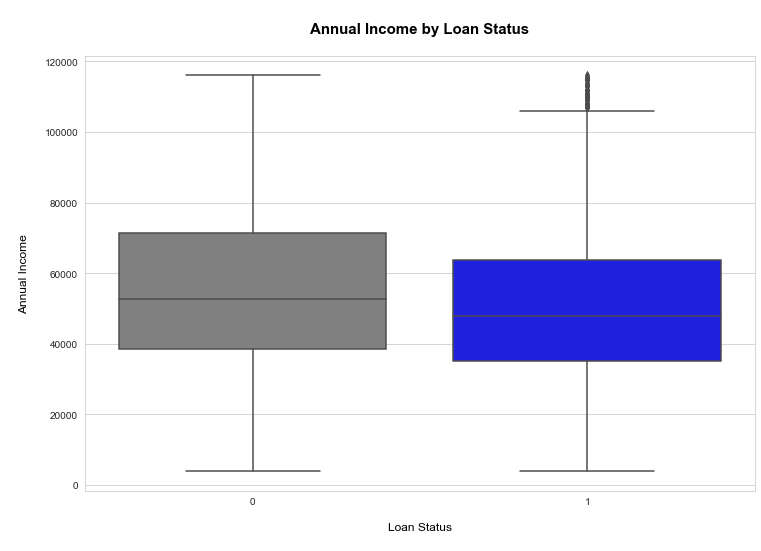

In [68]:
#Annual Income across loan status
sns.set_palette(['gray','blue'])
plt.figure(figsize = (12,8))
sns.boxplot(y='annual_inc', x='loan_status', data=df)
plt.title('\nAnnual Income by Loan Status\n', weight = 'bold',fontsize=15,color='black')
plt.ylabel('\nAnnual Income\n', fontsize=12,color='black')
plt.xlabel('\nLoan Status\n',fontsize=12,color='black')
plt.show()

<b> Inference: <b/>
    
    
Annual Income for defaulters has median of less than 5000. But let's see the distribution. 

<Figure size 864x576 with 0 Axes>

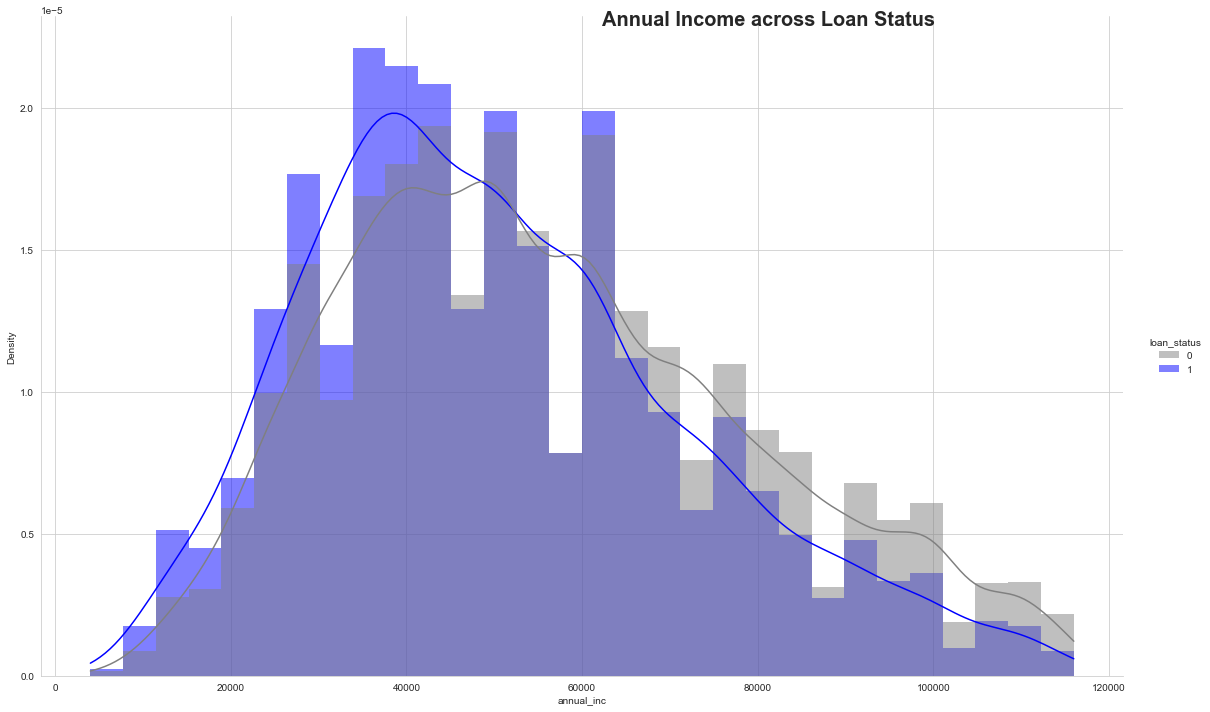

In [69]:
#Annual income across loan status
sns.set_palette(['gray','blue'])
sns.set_style("whitegrid")
plt.figure(figsize = (12,8))
ax = sns.displot(
    df, x='annual_inc', hue='loan_status',
    bins=30, linewidth=0, kde=True,
    stat="density", common_norm=False,
    height=10,aspect=1.6)
ax.set_axis_labels(xlabel='Annual Income', ylabel='Density', fontsize = 12)
ax.fig.suptitle("Annual Income across Loan Status\n\n\n\n",weight='bold', fontsize = 20, ha = 'left')
plt.show()

<b> Inference: </b>
it is obviously that applicant with low income approximately less than 40K or 50K tend to default (stop paying)

<Figure size 864x576 with 0 Axes>

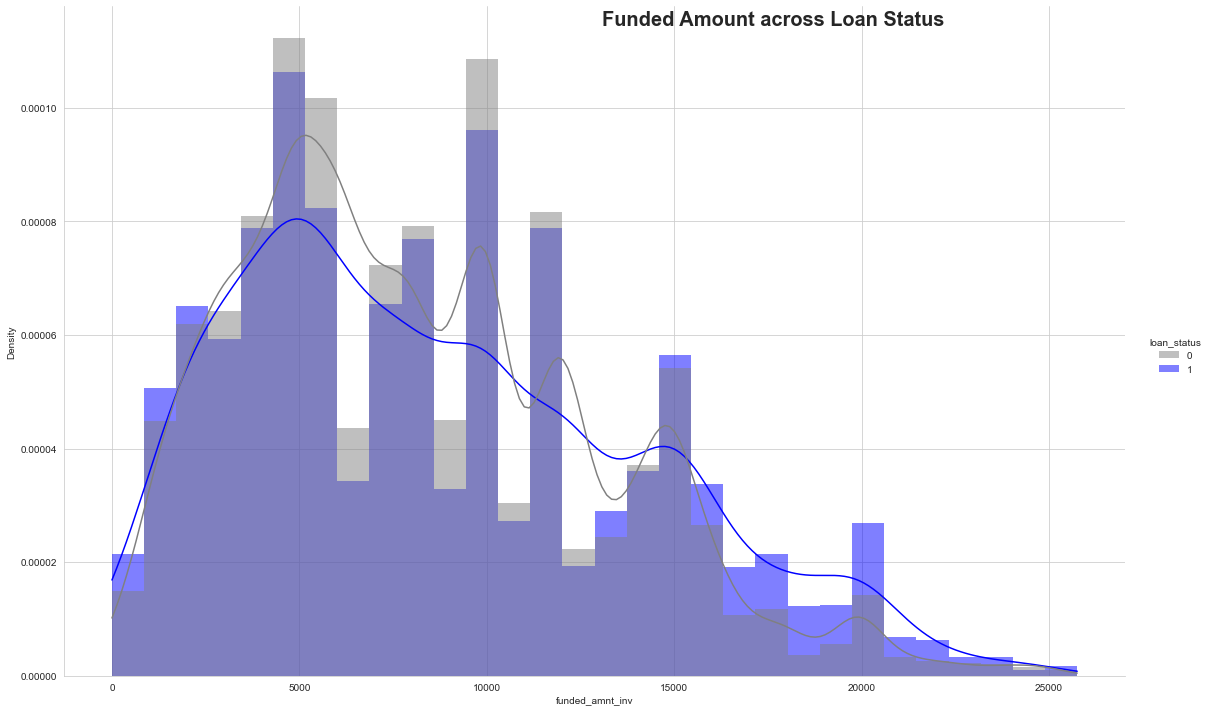

In [70]:
#Annual income across loan status
sns.set_palette(['gray','blue'])
sns.set_style("whitegrid")
plt.figure(figsize = (12,8))
ax = sns.displot(
    df, x='funded_amnt_inv', hue='loan_status',
    bins=30, linewidth=0, kde=True, 
    stat="density", common_norm=False,
    height=10,aspect=1.6, hue_order = [0,1])
ax.set_axis_labels(xlabel='Funded Amount', ylabel='Density', fontsize = 12)
ax.fig.suptitle("Funded Amount across Loan Status\n\n\n\n", weight='bold',fontsize = 20, ha = 'left')

plt.show()

<b>Inference: </b>
Generally, Most defaulters are funded between 5K and 10K.

<Figure size 864x576 with 0 Axes>

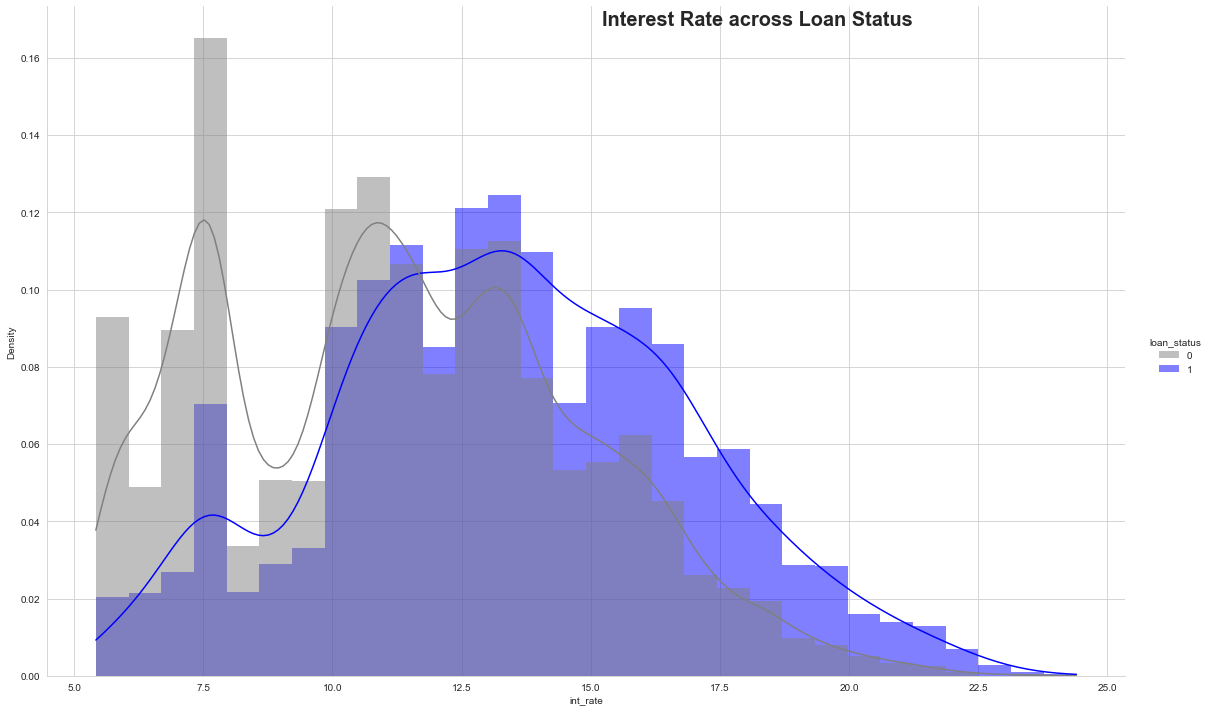

In [71]:
#Interest rate across loan status
sns.set_palette(['gray','blue'])
sns.set_style("whitegrid")
plt.figure(figsize = (12,8))
ax = sns.displot(
    df, x='int_rate', hue='loan_status',
    bins=30, linewidth=0, kde=True, 
    stat="density", common_norm=False,
    height=10,aspect=1.6, hue_order = [0,1])

ax.set_axis_labels(xlabel='Interest Rate', ylabel='Density', fontsize = 12)
ax.fig.suptitle("Interest Rate across Loan Status\n\n\n\n", weight='bold',fontsize = 20, ha = 'left')

plt.show()

<b> Inference: </b>
Clearly, applicants with more than 12.5 interest rate have higher probability to default.


<Figure size 864x576 with 0 Axes>

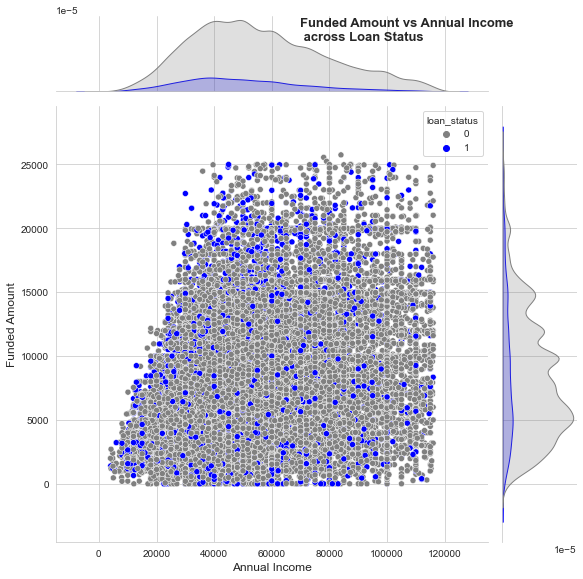

In [72]:
#Annaul Income vs Funded amount by investors
plt.figure(figsize = (12,8))
ax = sns.jointplot(data=df, 
              x='annual_inc', 
              y='funded_amnt_inv', 
              hue="loan_status", kind='scatter', height=8 )

ax.set_axis_labels(xlabel='Annual Income', ylabel='Funded Amount', fontsize = 12)
ax.fig.suptitle("Funded Amount vs Annual Income \n across Loan Status\n\n\n\n", weight='bold',fontsize = 13, ha = 'left')
plt.show()

<b> Inference: </b>

From the above graph, most defaulters have more or less 40K Annual income funded by more or less 20K. So funding with half the annual income might lead to default.

<Figure size 864x576 with 0 Axes>

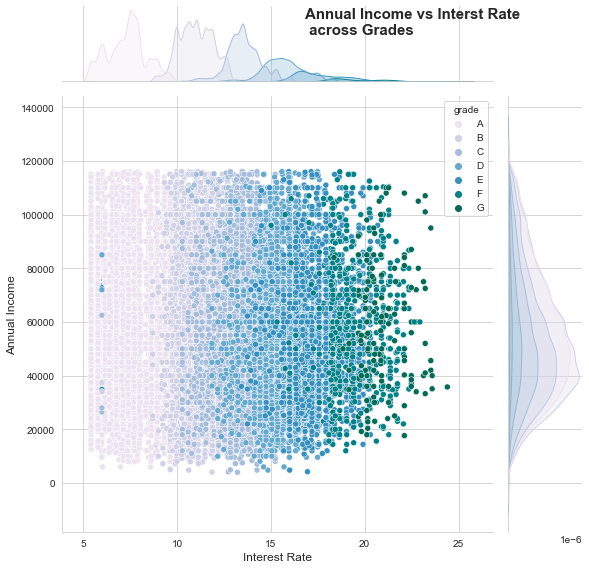

In [73]:
#Annaul Income vs Funded amount by investors across grade
plt.figure(figsize = (12,8))
ax = sns.jointplot(data=df, 
              x='int_rate', 
              y='annual_inc', 
              hue="grade",palette ='PuBuGn', hue_order= ['A','B','C','D','E','F','G'], height=8)
ax.set_axis_labels(xlabel='Interest Rate', ylabel='Annual Income', fontsize = 12)
ax.fig.suptitle("Annual Income vs Interest Rate\n across Grades\n\n\n\n", weight='bold',fontsize = 15, ha = 'left')
plt.show()

<b> Inference: </b>

The above graph clearly shows that applicants grade is of high importance. 


The applicant's grade is inversely proportional with the interest rate.

<Figure size 864x576 with 0 Axes>

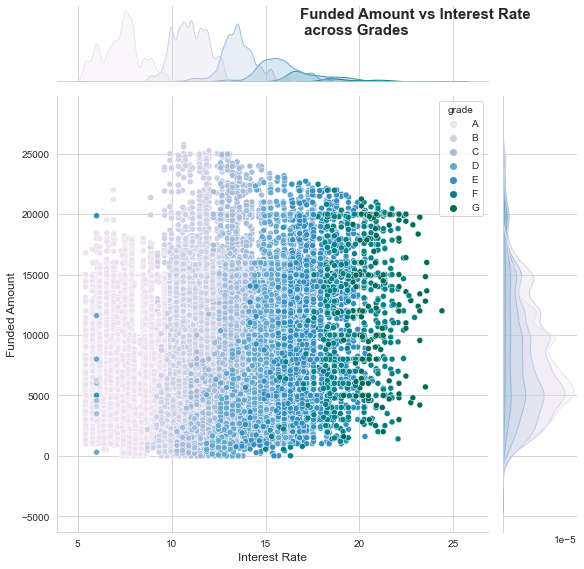

In [99]:
#Annaul Income vs Funded amount by investors across grade
plt.figure(figsize = (12,8))
ax = sns.jointplot(data=df, 
              x='int_rate', 
              y='funded_amnt_inv', 
              hue="grade",palette ='PuBuGn', hue_order= ['A','B','C','D','E','F','G'], height=8)
ax.set_axis_labels(xlabel='Interest Rate', ylabel='Funded Amount', fontsize = 12)
ax.fig.suptitle("Funded Amount vs Interest Rate\n across Grades\n\n\n\n", weight='bold',fontsize = 15, ha = 'left')
plt.show()

<Figure size 864x576 with 0 Axes>

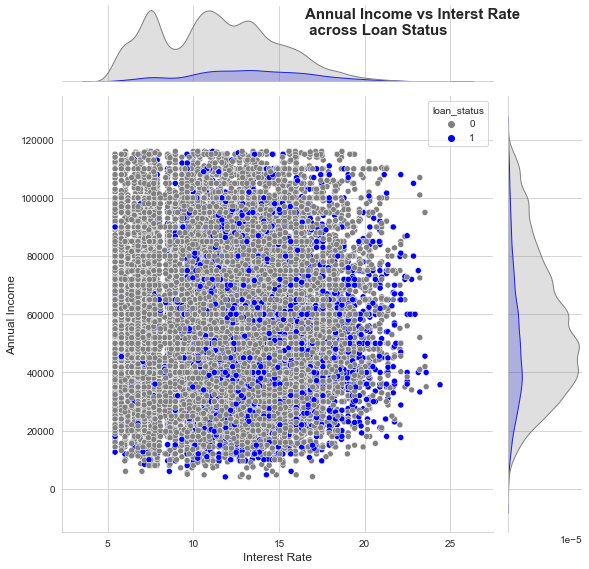

In [74]:
#Interest Rate vs Annual Income across loan status
sns.set_palette(['gray','blue'])
plt.figure(figsize = (12,8))
ax = sns.jointplot(data=df, 
              x='int_rate', 
              y='annual_inc', 
              hue="loan_status"
              ,height=8)
ax.set_axis_labels(xlabel='Interest Rate', ylabel='Annual Income', fontsize = 12)
ax.fig.suptitle("Annual Income vs Interst Rate\n across Loan Status\n\n\n\n", weight='bold',fontsize = 15, ha = 'left')
plt.show()

<b> Inference: </b>

Obviously, as Interest Rate goes higher, defaulters increases.


Most Defaulters has more or less 12 interest rate, and annual income of more or less 40K. 


These are the same applicants who are funded by more or less 15K

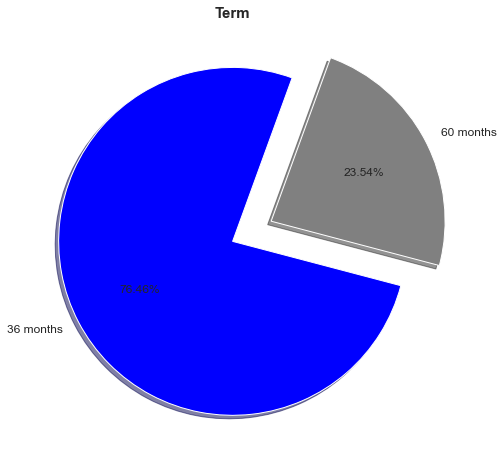

In [75]:
#Term Pie Chart
plt.figure(figsize = (12,8))
sns.set_palette(['blue','gray'])
df.term.value_counts().plot(kind= 'pie', explode=[0,0.25], autopct='%1.2f%%', shadow=True, 
                                              fontsize=12, startangle=70)
plt.ylabel('')
plt.title('Term',  weight='bold', fontsize = 15)
plt.show()

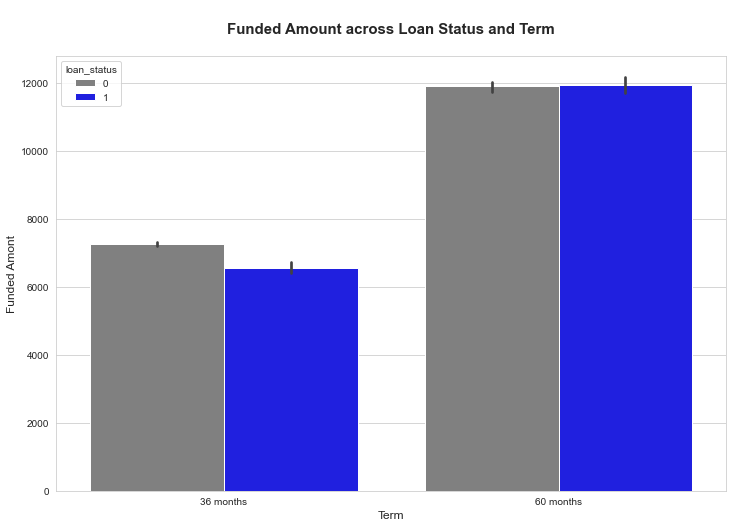

In [76]:
#Term vs Funded Amount
sns.set_palette(['gray','blue'])
plt.figure(figsize = (12,8))
sns.barplot(data=df, 
              x='term', 
              y='funded_amnt_inv', 
              hue="loan_status")
plt.xlabel('Term', fontsize = 12)
plt.ylabel('Funded Amont', fontsize = 12)
plt.title('\nFunded Amount across Loan Status and Term\n', weight='bold',fontsize = 15)
plt.show()

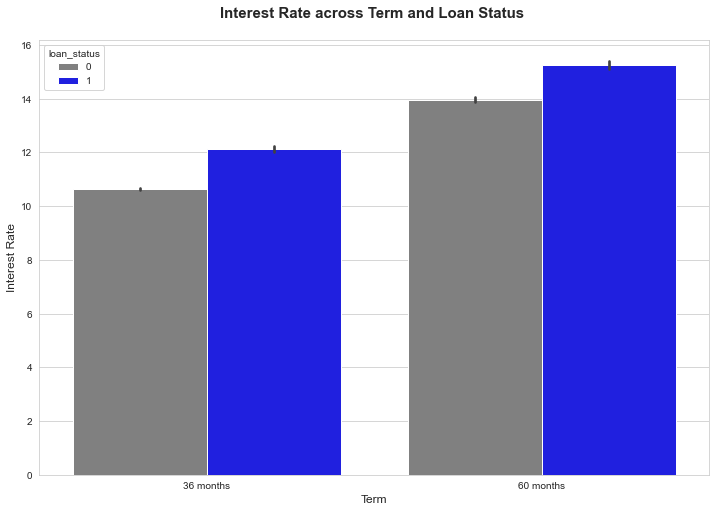

In [77]:
#Term Vs Interst rate
plt.figure(figsize = (12,8))
sns.barplot(data=df, 
              x='term', 
              y='int_rate', 
              hue="loan_status")
plt.xlabel('Term', fontsize = 12)
plt.ylabel('Interest Rate', fontsize = 12)
plt.title('Interest Rate across Term and Loan Status \n', weight='bold' , fontsize = 15)
plt.show()

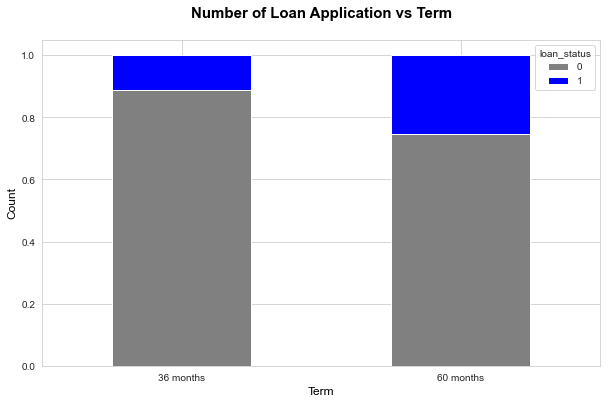

In [78]:
#Stacked bar chart to see proportion
from matplotlib import cm
from matplotlib.colors import ListedColormap

cmp = ListedColormap(['gray', 'blue'])
pd.crosstab(index=df['term'],
                             columns=df['loan_status']
                             ,normalize="index").plot(kind='bar', 
                    stacked=True, 
                    cmap=cmp, 
                    figsize=(10, 6), )
plt.title('Number of Loan Application vs Term\n', weight = 'bold',fontsize=15,color='black')
plt.xlabel('Term', fontsize=12,color='black')
plt.ylabel('Count', fontsize=12,color='black')
plt.xticks(rotation = 0)
plt.show()

<b> Inference: </b>

So, from the above 4 graphs, term is strong variable that drive applicants to default. Clearly, applicants with 60 Months Term are less than 36 Months, but they have higher funds, higher interest rate and their probability to default is higher of course. 

&nbsp;

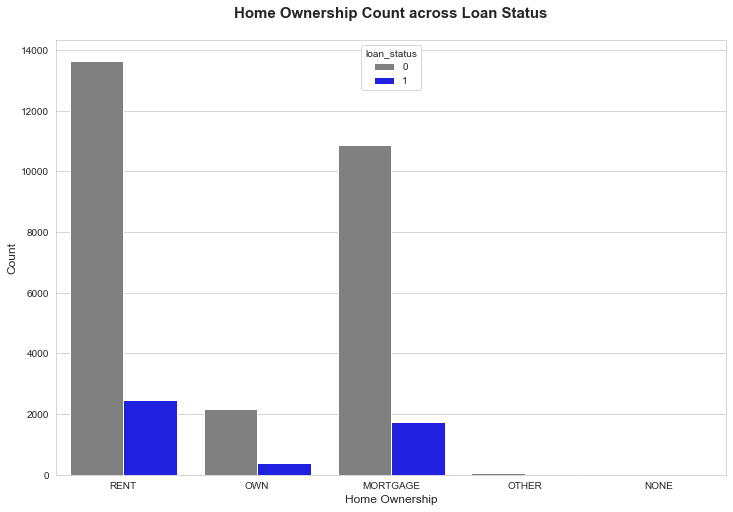

In [79]:
#Home Ownership
plt.figure(figsize = (12,8))
sns.countplot(data=df, 
              x='home_ownership',  
              hue="loan_status")
plt.xlabel('Home Ownership', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.title('Home Ownership Count across Loan Status\n', weight='bold' , fontsize = 15)
plt.show()

<b> Inference: </b>

Applicants with Rent home are the most who apply

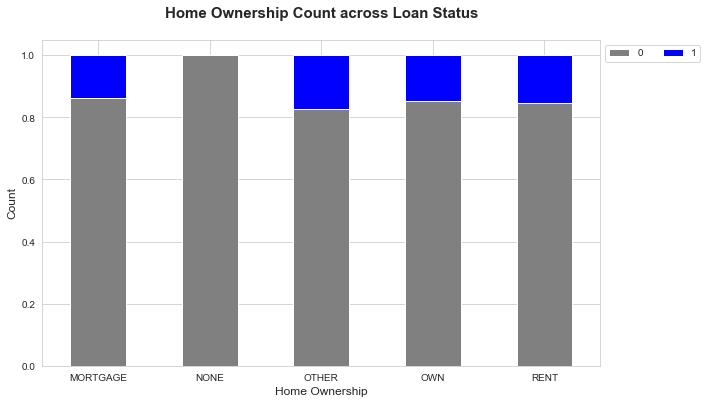

In [80]:
#Stacked bar chart to see proportion
from matplotlib import cm
from matplotlib.colors import ListedColormap

cmp = ListedColormap(['gray', 'blue'])
pd.crosstab(index=df['home_ownership'],
                             columns=df['loan_status']
                             ,normalize="index").plot(kind='bar', 
                    stacked=True, 
                    cmap=cmp, 
                    figsize=(10, 6), )
plt.xlabel('Home Ownership', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.title('Home Ownership Count across Loan Status\n', weight='bold' , fontsize = 15)
plt.xticks(rotation = 0)
plt.legend(bbox_to_anchor =(1, 1), ncol = 2)
plt.show()

<b> Inference: </b>


No big difference between the clearly-stated segments of home ownership variable. So, it may not be a variable to drive applicants to default. Although "Rent segment" and "Mortgage" have slight increase in terms of defaulters  

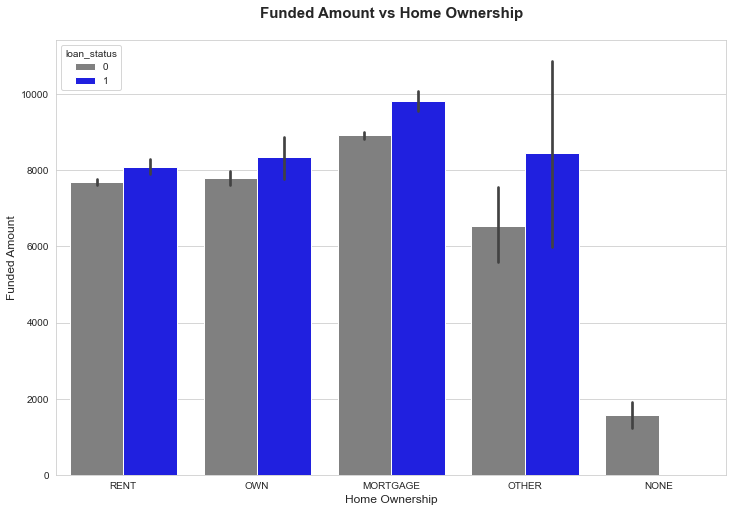

In [81]:
#Home Ownership vs funded amount
plt.figure(figsize = (12,8))
sns.barplot(data=df, 
              x='home_ownership', 
              y='funded_amnt_inv', 
              hue="loan_status")
plt.xlabel('Home Ownership', fontsize = 12)
plt.ylabel('Funded Amount', fontsize = 12)
plt.title('Funded Amount vs Home Ownership\n', weight='bold' , fontsize = 15)
plt.show()

<b> Inference: </b>

people who have Mortgaged homes are most funded. And they have same percentage of default as other segments. So Lending Club should be aware of this segment since it has most of the funds

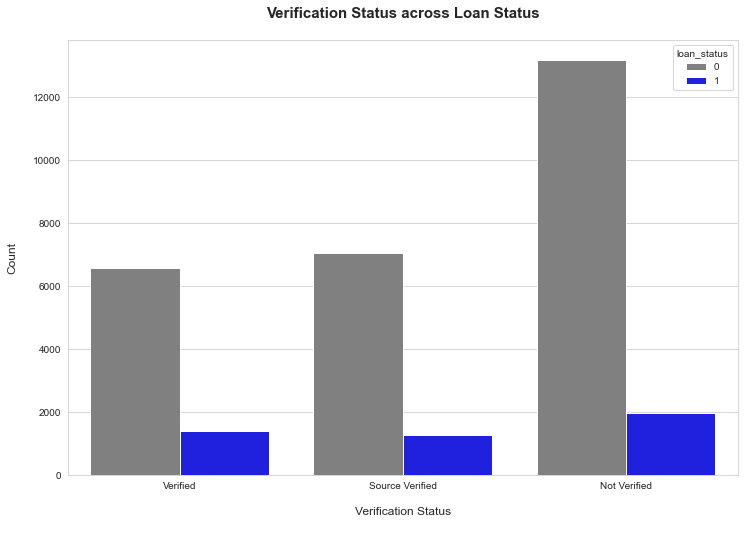

In [82]:
#verification across Loan Status
plt.figure(figsize = (12,8))
sns.countplot(data=df, 
              x='verification_status',  
              hue="loan_status")
plt.title('Verification Status across Loan Status\n', weight = 'bold',fontsize = 15)
plt.xlabel('\nVerification Status\n', fontsize = 12)
plt.ylabel('Count\n', fontsize = 12)
plt.show()

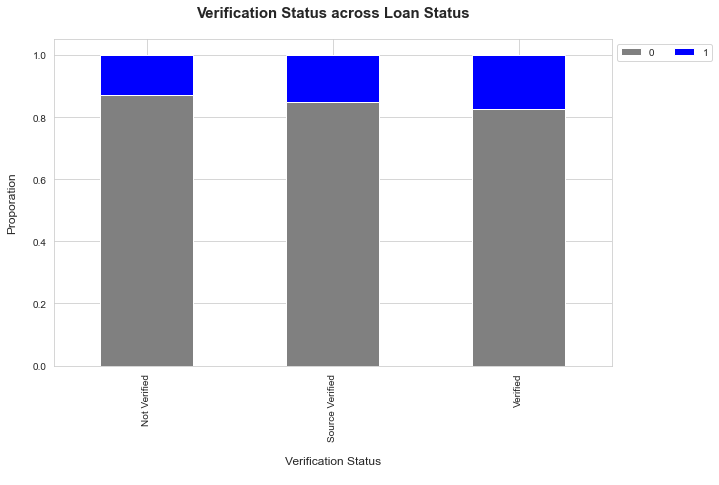

In [83]:
#Stacked bar chart to see proportion
from matplotlib import cm
from matplotlib.colors import ListedColormap

cmp = ListedColormap(['gray', 'blue'])
pd.crosstab(index=df['verification_status'],
                             columns=df['loan_status'],
                             normalize="index").plot(kind='bar', 
                    stacked=True, 
                    cmap=cmp, 
                    figsize=(10, 6))
plt.title('Verification Status across Loan Status\n', weight = 'bold',fontsize = 15)
plt.xlabel('\nVerification Status\n', fontsize = 12)
plt.ylabel('Proporation\n', fontsize = 12)
plt.legend(bbox_to_anchor =(1, 1), ncol = 2)
plt.show()

<b> Inference: </b>
Not-verified-income customers are the most number of applications received by Lending Club   

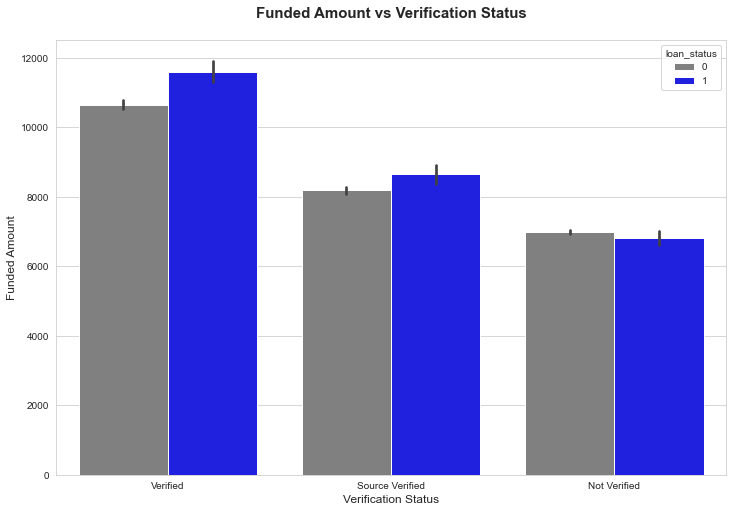

In [100]:
plt.figure(figsize = (12,8))
sns.barplot(data=df, 
              x='verification_status', 
              y='funded_amnt_inv', 
              hue="loan_status")
plt.xlabel('Verification Status', fontsize = 12)
plt.ylabel('Funded Amount', fontsize = 12)
plt.title('Funded Amount vs Verification Status\n', weight='bold' , fontsize = 15)
plt.show()

<b> Inference: </b>

Verified applicants are getting an advantage of being funded more, even though they have a high probability of default. So, Lending Club has to be sure of their verification documents.  

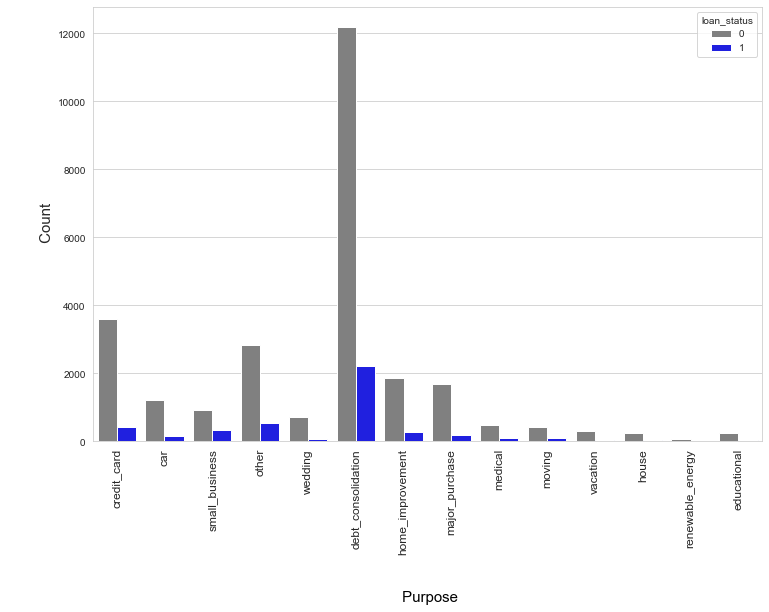

In [85]:
#Purpose across loan Status
plt.figure(figsize = (12,8))
sns.countplot(data=df, 
              x='purpose',  
              hue="loan_status")
plt.xlabel('\n \n Purpose',fontsize=15, color = 'black')
plt.ylabel('\n \n Count',fontsize=15)
plt.xticks(rotation=90, fontsize = 12)
plt.show()

<b> Inference: </b>

Debt Consolidation is the top purpose for customer to apply for a loan .  

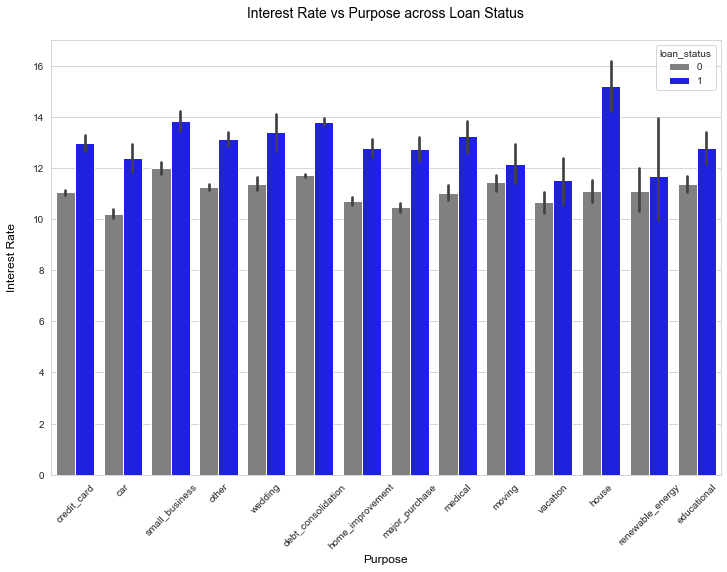

In [86]:
#Purpose across loan Status
fig, ax = plt.subplots(figsize = (12,8))
ax = sns.barplot(data=df,hue='loan_status',x='purpose', y = 'int_rate', orient='v')
ax.set_title('Interest Rate vs Purpose across Loan Status\n',fontsize=14,color='black')
ax.set_xlabel('Purpose',fontsize=12,color = 'black' )
plt.xticks(rotation=45)
ax.set_ylabel('Interest Rate\n',fontsize=12,color = 'black')
plt.show()

<b> Inference: </b>
House purpose is the highest interest rate.

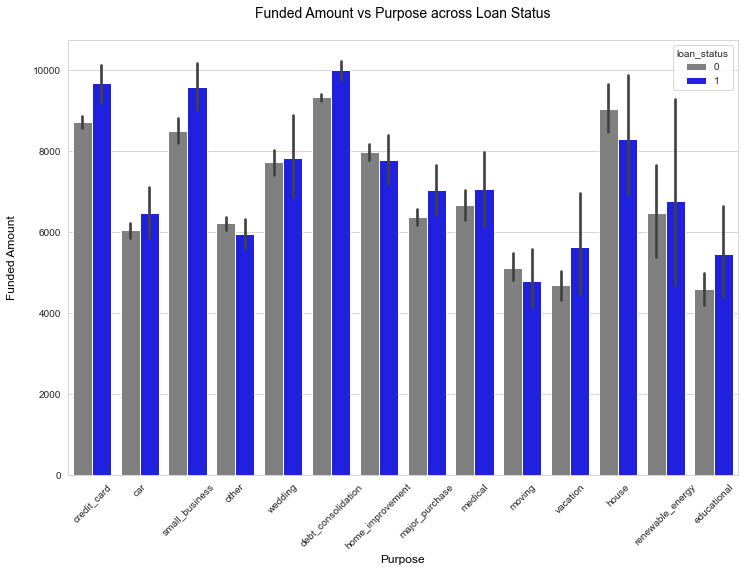

In [87]:
#Purpose across loan Status
fig, ax = plt.subplots(figsize = (12,8))
ax = sns.barplot(data=df,hue='loan_status',x='purpose', y = 'funded_amnt_inv', orient='v')
ax.set_title('Funded Amount vs Purpose across Loan Status\n',fontsize=14,color='black')
ax.set_xlabel('Purpose',fontsize=12,color = 'black' )
ax.set_ylabel('Funded Amount\n',fontsize=12,color = 'black')
plt.xticks(rotation=45)
plt.show()

<b> Inference: </b>
Small Businesses then Debt Consolidation purposes funded more than the other purpose, and despite that they have the highest probablity of a customer to default.

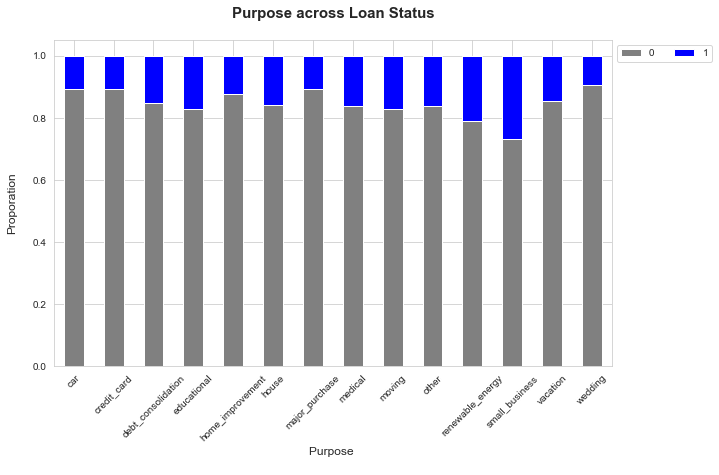

In [102]:
#This to ensure the above the inference
from matplotlib import cm
from matplotlib.colors import ListedColormap

cmp = ListedColormap(['gray', 'blue'])
pd.crosstab(index=df['purpose'],
                             columns=df['loan_status'],
                             normalize="index").plot(kind='bar', 
                    stacked=True, 
                    cmap=cmp, 
                    figsize=(10, 6))
plt.title('Purpose across Loan Status\n', weight = 'bold',fontsize = 15)
plt.xlabel('Purpose \n', fontsize = 12)
plt.ylabel('Proporation\n', fontsize = 12)
plt.xticks(rotation = 45)
plt.legend(bbox_to_anchor =(1, 1), ncol = 2)
plt.show()

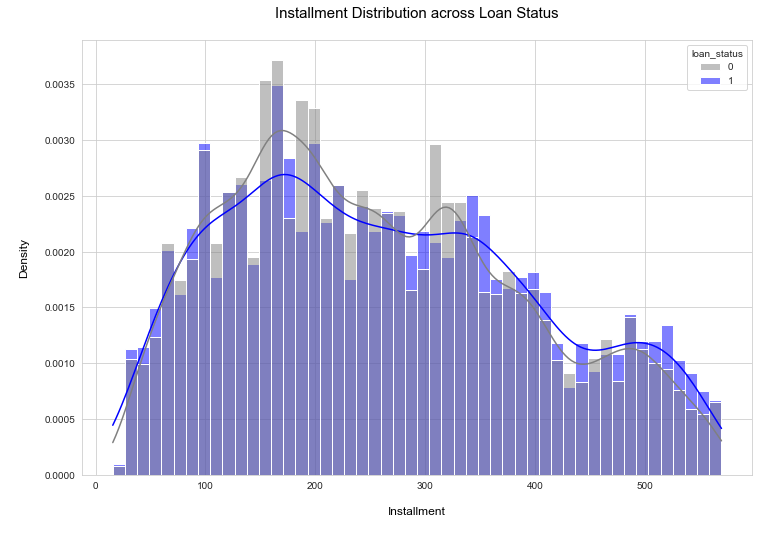

In [89]:
#installment
sns.set_palette(['gray','blue'])
plt.figure(figsize = (12,8))
sns.histplot(df, x='installment', hue='loan_status',
stat="density", common_norm=False, kde = True, bins = 50)
plt.xlabel('\nInstallment\n', fontsize = 12, color = 'black' )
plt.ylabel('\nDensity\n', fontsize = 12, color = 'black')
plt.title('Installment Distribution across Loan Status\n', fontsize = 15, color = 'black')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), title_fontsize=12)
plt.show()

<b> Inference: </b>
 
 Approximately, most applicants get Installments between 170 and 200. and installments more than 340 drive the cleint to Default.


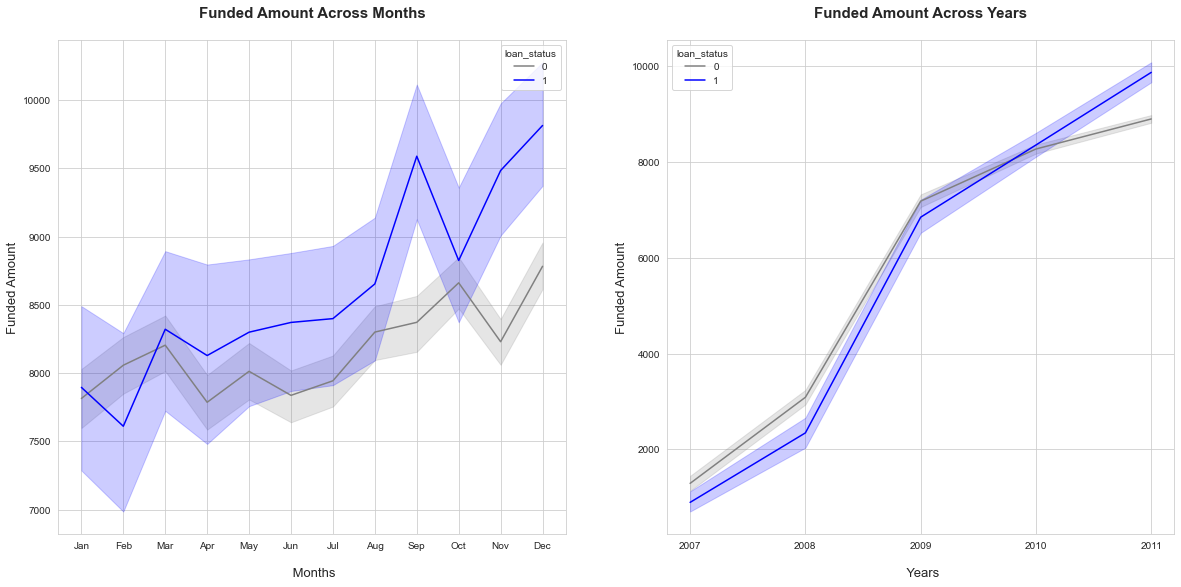

In [90]:
#plot of loan_status and issue_d_year and issue_d_month
sns.set_palette(['gray','blue'])
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)

ax = sns.lineplot(data =df,y='funded_amnt_inv', x='Month', hue ='loan_status', estimator = np.mean)
plt.title('Funded Amount Across Months\n', fontsize = 15,weight = 'bold')
plt.xlabel('\n Months', fontsize = 13)
plt.ylabel('Funded Amount', fontsize = 13)
ax.invert_xaxis()


plt.subplot(2,2,2)
ax = sns.lineplot(data =df,y='funded_amnt_inv', x='Year', hue ='loan_status', estimator = np.mean)
plt.title('Funded Amount Across Years\n',fontsize = 15, weight = 'bold')
plt.xlabel('\n Years', fontsize = 13)
plt.ylabel('Funded Amount', fontsize = 13)
ax.invert_xaxis()
plt.show()

<b> Inference: </b>
Funded Amount is the highest in DEC and SEP months. 

And with every year the Funded Amount is increasing

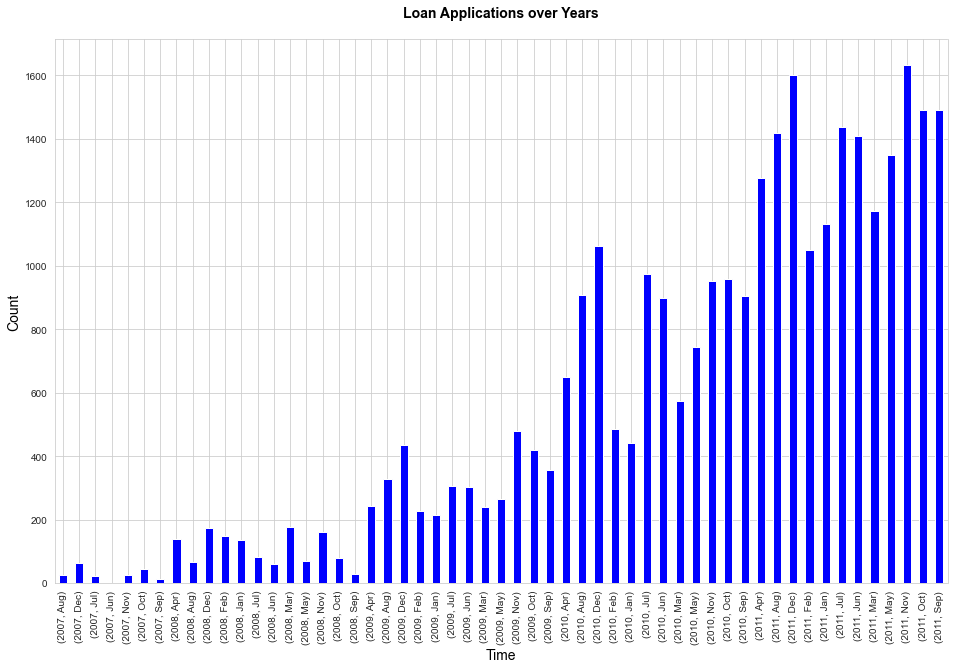

In [91]:
#just for clarification
sns.set_palette(['blue'])
sns.set_style("whitegrid")
plt.figure(figsize=(16,10),facecolor='w')
df.groupby(['Year','Month']).term.count().plot(kind='bar')
plt.ylabel('Count',fontsize=14,color='black')
plt.xlabel('Time',fontsize=14,color = 'black') 
plt.title("Loan Applications over Years\n",weight = 'bold',fontsize=14,color='black')
plt.show()

<b> Inference: </b>

At the end of every year "DEC", there is a spike in number of loans 

<b> Inference: </b>
Most customers has a dti between 10-15

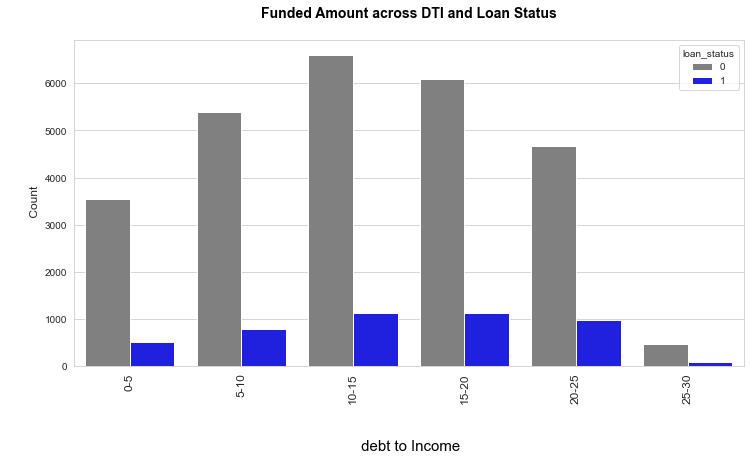

In [92]:
#Purpose across loan Status
sns.set_palette(['gray','blue'])
plt.figure(figsize = (12,6))
sns.countplot(data=df, 
              x='debt_to_income',  
              
              hue="loan_status")
plt.xlabel('\n \n debt to Income',fontsize=15, color = 'black')
plt.ylabel('\n \n Count',fontsize=12)
plt.title("Funded Amount across DTI and Loan Status\n",weight = 'bold',fontsize=14,color='black')
plt.xticks(rotation=90, fontsize = 12)
plt.show()

<b> Inference: </b>

<b>DTI:</b> compares how much you owe each month to how much you earn.

bracket "10-15" and "15-20" are the most that apply for loans

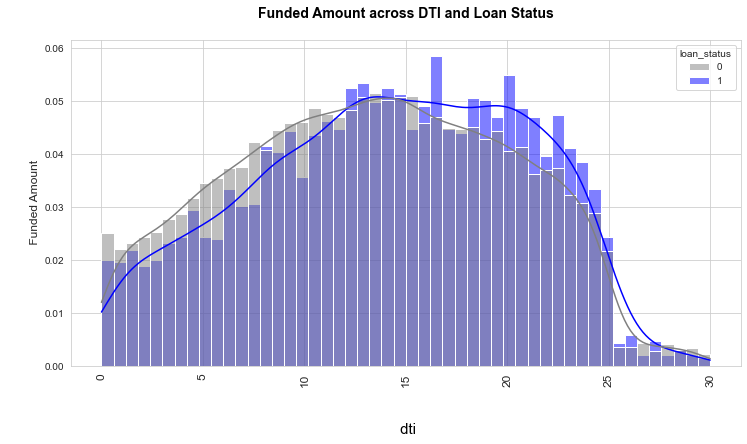

In [93]:
#Purpose across loan Status
sns.set_palette(['gray','blue'])
plt.figure(figsize = (12,6))
sns.histplot(data=df, 
              x='dti',  
              stat="density", common_norm=False, kde = True, bins = 50,
              hue="loan_status")
plt.xlabel('\n \n dti',fontsize=15, color = 'black')
plt.ylabel('\n \n Funded Amount',fontsize=12)
plt.title("Funded Amount across DTI and Loan Status\n",weight = 'bold',fontsize=14,color='black')
plt.xticks(rotation=90, fontsize = 12)
plt.show()

<b> Inference: </b>

Most defaulters has DTI approximately from 18 until 25.

There is a cut after the 25 DTI, which indicates customers with high DTI don't frequently apply for loans

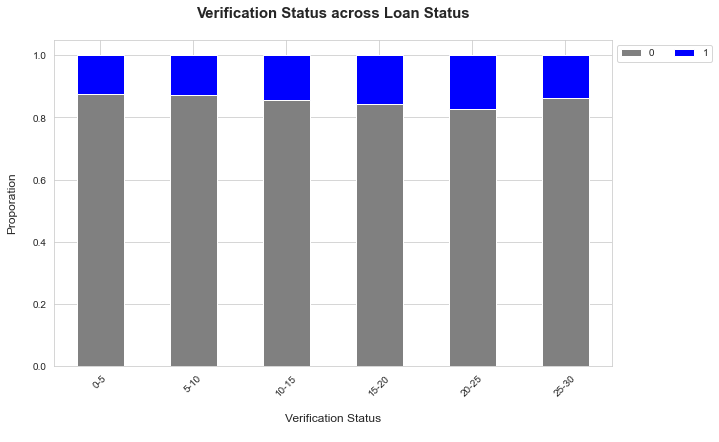

In [94]:
#this for verification
from matplotlib import cm
from matplotlib.colors import ListedColormap

cmp = ListedColormap(['gray', 'blue'])
pd.crosstab(index=df['debt_to_income'],
                             columns=df['loan_status'],
                             normalize="index").plot(kind='bar', 
                    stacked=True, 
                    cmap=cmp, 
                    figsize=(10, 6))
plt.title('Verification Status across Loan Status\n', weight = 'bold',fontsize = 15)
plt.xlabel('\nVerification Status\n', fontsize = 12)
plt.ylabel('Proporation\n', fontsize = 12)
plt.xticks(rotation = 45)
plt.legend(bbox_to_anchor =(1, 1), ncol = 2)
plt.show()

**the above Just to reinforce the concept above**

In [95]:
#Geographic graph for defaulter across states
import plotly.express as px
fig = px.choropleth(df[df['loan_status']==1].groupby('addr_state')['loan_status'].count().reset_index(),
                    locations='addr_state', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='loan_status',
                    color_continuous_scale="PuBuGn", 
                    )
fig.update_layout(
      title_text = 'Default Counts by State',
      title_font_family="Calibri",
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.45, 
         )
fig.add_scattergeo(
    locations=df['addr_state'],
    locationmode='USA-states',
    text=df['addr_state'],
    mode='text')

fig.show()

<b> Inference: </b>

CA is highest state with default rate